In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'F'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180, include_ah=True)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-16 21:00:00,2020-09-16 21:00:00,7.03,7.0400,7.0500,7.070,21774
2020-09-17 21:00:00,2020-09-17 21:00:00,7.31,7.3100,7.3500,7.360,310143
2020-09-18 21:00:00,2020-09-18 21:00:00,7.21,7.2300,7.2200,7.230,23682
2020-09-21 21:00:00,2020-09-21 21:00:00,6.86,6.8700,6.8700,6.880,61213
2020-09-22 21:00:00,2020-09-22 21:00:00,6.77,6.7798,6.7900,6.790,56943
...,...,...,...,...,...,...
2021-03-12 14:00:00,2021-03-12 14:00:00,12.73,12.7800,12.9700,12.990,8654351
2021-03-12 21:00:00,2021-03-12 21:00:00,13.34,13.3500,13.3401,13.375,602378
2021-03-13 00:00:00,2021-03-13 00:00:00,13.32,13.3600,13.3700,13.370,44896


In [3]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = datetime.now() > datetime.now().replace(hour=22, minute = 0, second = 0, microsecond =0))

,t,o,l,h,c,v
0,2021-03-15 20:00:00,13.16,13.17,13.2,13.22,414428


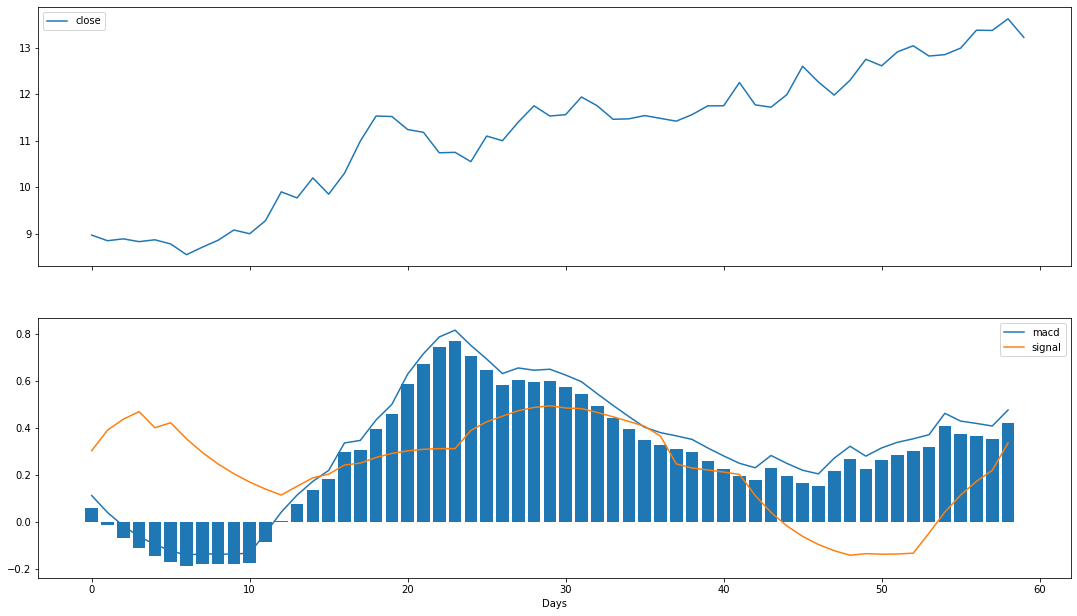

In [4]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

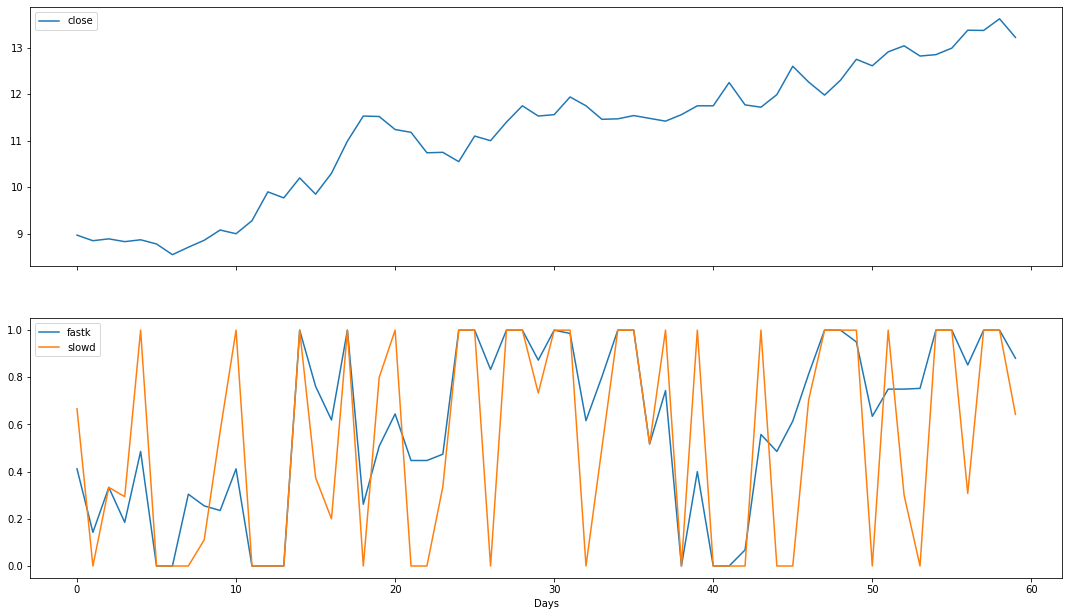

In [5]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)